In [1]:
import numpy as np
from pymoo.core.repair import Repair

class StartFromZeroRepair(Repair):

    def _do(self, problem, X, **kwargs):
        I = np.where(X == 0)[1]

        for k in range(len(X)):
            i = I[k]
            X[k] = np.concatenate([X[k, i:], X[k, :i]])

        return X

In [2]:
from pymoo.algorithms.soo.nonconvex.ga import GA
from pymoo.optimize import minimize
from pymoo.problems.single.traveling_salesman import create_random_tsp_problem
from pymoo.operators.sampling.rnd import PermutationRandomSampling
from pymoo.operators.crossover.ox import OrderCrossover
from pymoo.operators.mutation.inversion import InversionMutation
from pymoo.termination.default import DefaultSingleObjectiveTermination

problem = create_random_tsp_problem(30, 100, seed=1)

algorithm = GA(
    pop_size=20,
    sampling=PermutationRandomSampling(),
    mutation=InversionMutation(),
    crossover=OrderCrossover(),
    repair=StartFromZeroRepair(),
    eliminate_duplicates=True
)

# if the algorithm did not improve the last 200 generations then it will terminate (and disable the max generations)
termination = DefaultSingleObjectiveTermination(period=200, n_max_gen=np.inf)

res = minimize(
    problem,
    algorithm,
    termination,
    seed=1,
)


Compiled modules for significant speedup can not be used!
https://pymoo.org/installation.html#installation

To disable this warning:
from pymoo.config import Config
Config.warnings['not_compiled'] = False



In [3]:
print("Traveling Time:", np.round(res.F[0], 3))
print("Function Evaluations:", res.algorithm.evaluator.n_eval)

Traveling Time: 486.53
Function Evaluations: 4020


c:\Users\Tanakit Siriteerapan\AppData\Local\Programs\Python\Python312\Lib\site-packages\pymoo\problems\single\traveling_salesman.py:79: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


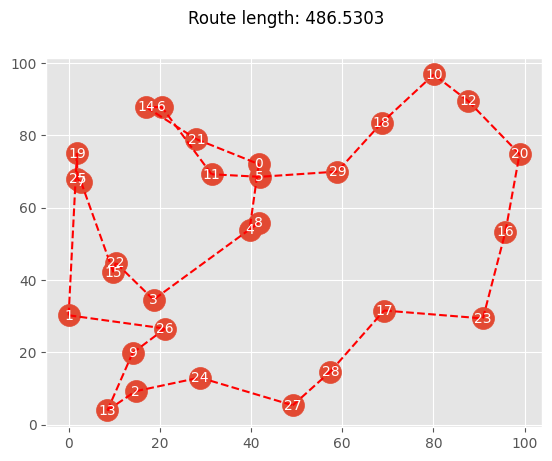

In [4]:
from pymoo.problems.single.traveling_salesman import visualize
visualize(problem, res.X)